In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm

In [2]:
from mlflow import log_metric, log_param, log_artifact

<AxesSubplot: xlabel='BuildingArea', ylabel='Price'>

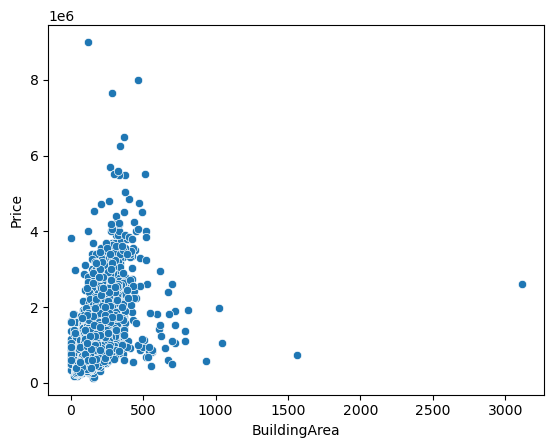

In [3]:
data = pd.read_csv('data/melb_data.csv')
data = data.dropna(axis=0)
data = data[['BuildingArea', 'Price']]
sns.scatterplot(x='BuildingArea', y='Price', data=data)

In [4]:
X = np.array([[1, x] for x in data['BuildingArea']])
Y = np.array(data['Price'])

theta = np.linalg.solve(X.T@X, X.T@Y)
print(f"analytische Lösung: {theta}")

analytische Lösung: [510531.72552189   3943.64499525]


In [5]:
%%time
alpha = 0.00007
log_param("alpha", f"{alpha:.6f}")
rounds = 1000000
log_param("rounds", rounds)
desc_theta = np.array([200000, 2000])
log_param("start_theta", desc_theta)

# log_interval = rounds*0.1
# print(f"Start: {desc_theta}")
for i in tqdm(range(1, rounds + 1)):
    desc_theta = desc_theta + alpha / len(X) * np.sum((Y - X@desc_theta) * X.T, axis=1)
    # if i % log_interval == 0:
    #     print(f"Runde {i}: {desc_theta}")

100%|██████████| 1000000/1000000 [03:35<00:00, 4647.62it/s]

CPU times: user 23min 6s, sys: 2min 18s, total: 25min 25s
Wall time: 3min 35s


In [6]:
price287 = desc_theta[0] + desc_theta[1]*287
print(f"Preisvorhersage für 287m²: {price287}")
log_metric("price287", price287)
print(f"Analytische Lösung: {theta[0] + theta[1]*287}")
log_metric("analytical_price287", theta[0] + theta[1]*287)

Preisvorhersage für 287m²: 1642357.8393441674
Analytische Lösung: 1642357.839159178


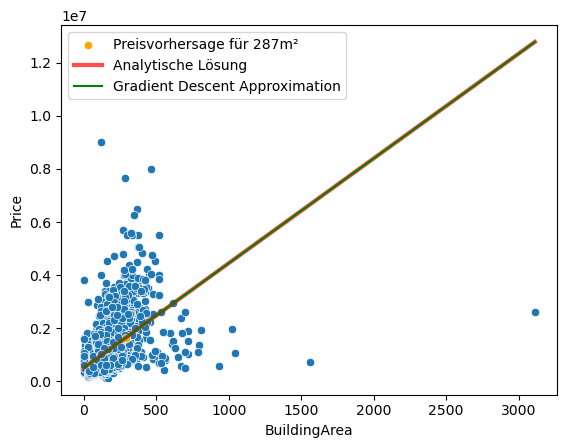

In [7]:
sns.scatterplot(x='BuildingArea', y='Price', data=data)
sns.scatterplot(x=[287], y=[price287], label='Preisvorhersage für 287m²', color='orange')
theta_line = [theta[0] + theta[1]*x for x in data['BuildingArea']]
desc_theta_line = [desc_theta[0] + desc_theta[1]*x for x in data['BuildingArea']]
sns.lineplot(x=data['BuildingArea'], y=theta_line, label='Analytische Lösung', color='red', linewidth=3, alpha=0.7)
plot = sns.lineplot(x=data['BuildingArea'], y=desc_theta_line, label='Gradient Descent Approximation', color='green')

In [8]:
import os

os.makedirs('.out', exist_ok=True)
plot.get_figure().savefig('.out/mel-housing-lin-reg.png')
log_artifact('.out/mel-housing-lin-reg.png')

FileNotFoundError: [Errno 2] No such file or directory: '.out/mel-housing-lin-reg.png'